In [23]:
# %pip install seaborn

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [26]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Continuous Data\adjusted_Limits.csv')

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al    C4_pct_Eth    C4_pct_H2O  HydWtr_pct_Ammonia  \
count  58125.000000  58125.000000  58125.000000        58125.000000   
mean       6.155516      1.404231     21.423910            0.988830   
std        0.327871      2.878268      4.522588            0.213687   
min        0.155707      0.001000      0.057000            0.070270   
25%        6.008990      0.635417     18.838300            0.875729   
50%        6.149820      1.142210     21.441800            0.943777   
75%        6.311670      1.717790     23.330700            1.045600   
max        8.058320     77.165000     95.818000            3.744840   

        HydWtr_Na2O       Butanol       DI55102       DI55152       FC55003  \
count  58125.000000  58125.000000  58125.000000  58125.000000  5.812500e+04   
mean       0.941366     11.920761      0.942577      0.932765  6.000200e+03   
std        4.031992     15.577968      0.054300      0.031842  1.047209e+03   
min        0.000000      0.000000      0.800002      0.809662  1.930000e-17   
25%        0.457871      3.841370      0.907847      0.912389  5.450040e+03   
50%        0.671809      6.033330      0.947801      0.933017  6.004850e+03   
75%        0.992915     12.075400      0.983561      0.952949  6.574970e+03   
max      279.492000     99.950000      1.120200      1.039590  1.470590e+04   

            FC55009       FC55552       FC55569       FC55576      FFC55555  \
count  58125.000000  58125.000000  58125.000000  58125.000000  58125.000000   
mean     838.049977  35350.897898   6624.175323    370.792085      0.771258   
std      612.485027   5715.472581    492.259405    254.395461      0.027075   
min        0.000000   7377.560000      0.000000      0.000000      0.000000   
25%      299.551000  33860.500000   6345.920000    197.123000      0.757367   
50%      816.339000  37919.100000   6579.410000    343.639000      0.771589   
75%     1315.790000  39006.400000   6834.610000    545.469000      0.788095   
max     2862.340000  52000.000000  10503.000000   1461.990000      0.998409   

            LC55557       LC90366       LC90368       PI55004       PI55020  \
count  58125.000000  58125.000000  58125.000000  58125.000000  58125.000000   
mean      69.529272     45.700398     36.512654      2.253150     -1.415145   
std        3.128809     28.866666     20.363663      1.308157      1.150919   
min        0.000000      0.000000      0.006367      0.001366     -5.655290   
25%       67.033900     20.264300     19.571300      1.251840     -2.301860   
50%       70.120500     46.479300     41.343900      1.927690     -1.385120   
75%       71.867800     76.866500     52.067800      3.071170     -0.395433   
max      100.000000     87.901600     81.210800     12.531800      2.692840   

            TC55552       TI55021  
count  58125.000000  58125.000000  
mean     168.252795    223.859571  
std       16.089173     11.529235  
min       98.687500     73.404200  
25%      155.330000    217.495000  
50%      172.500000    220.446000  
75%      180.739000    224.571000  
max      203.179000    344.636000

In [27]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 22


In [28]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [29]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date                  datetime64[ns]
425_pct_Al                   float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
HydWtr_pct_Ammonia           float64
HydWtr_Na2O                  float64
Butanol                      float64
DI55102                      float64
DI55152                      float64
FC55003                      float64
FC55009                      float64
FC55552                      float64
FC55569                      float64
FC55576                      float64
FFC55555                     float64
LC55557                      float64
LC90366                      float64
LC90368                      float64
PI55004                      float64
PI55020                      float64
TC55552                      float64
TI55021                      float64
dtype: object


Skipping datetime column: Date


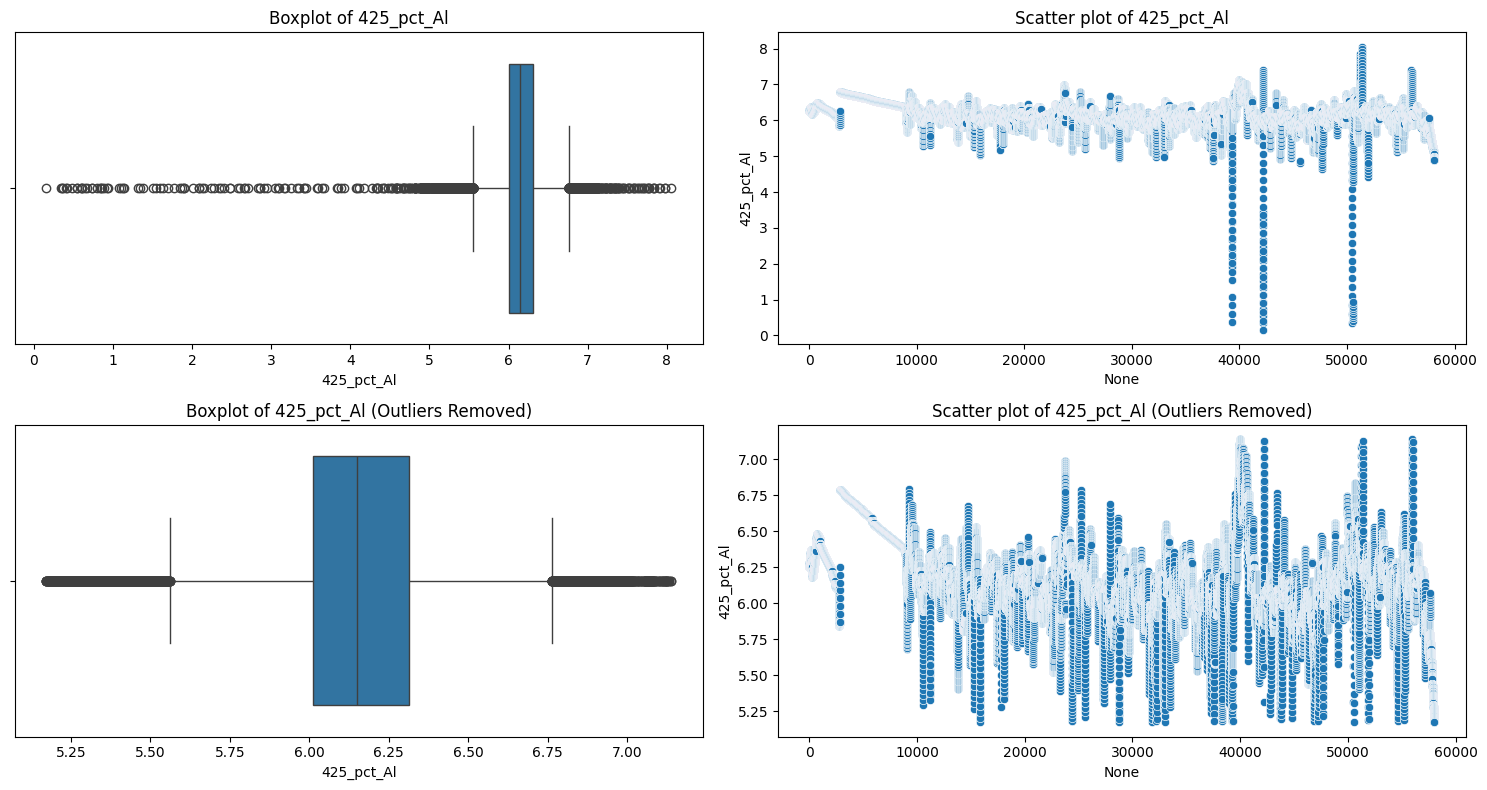

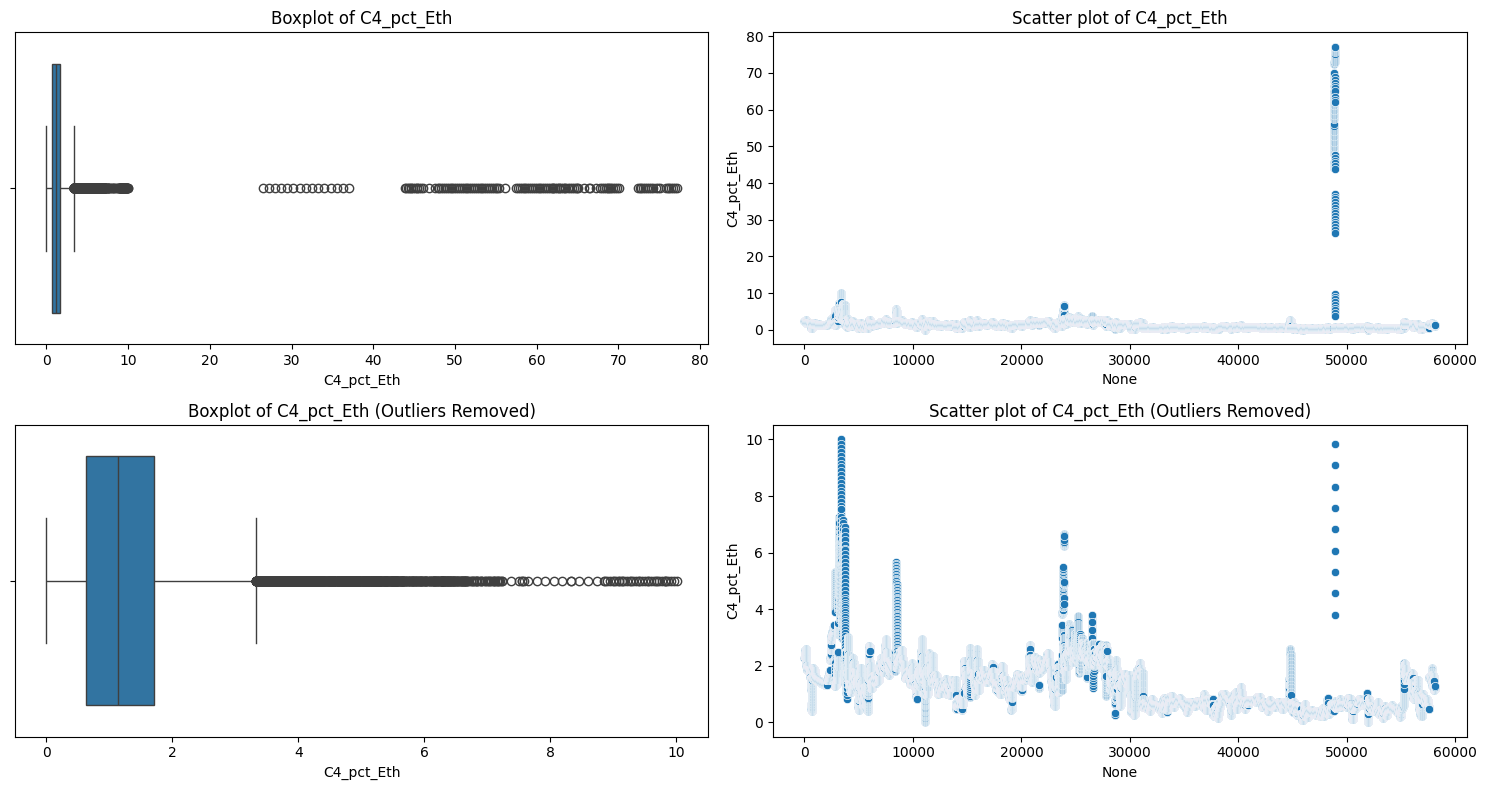

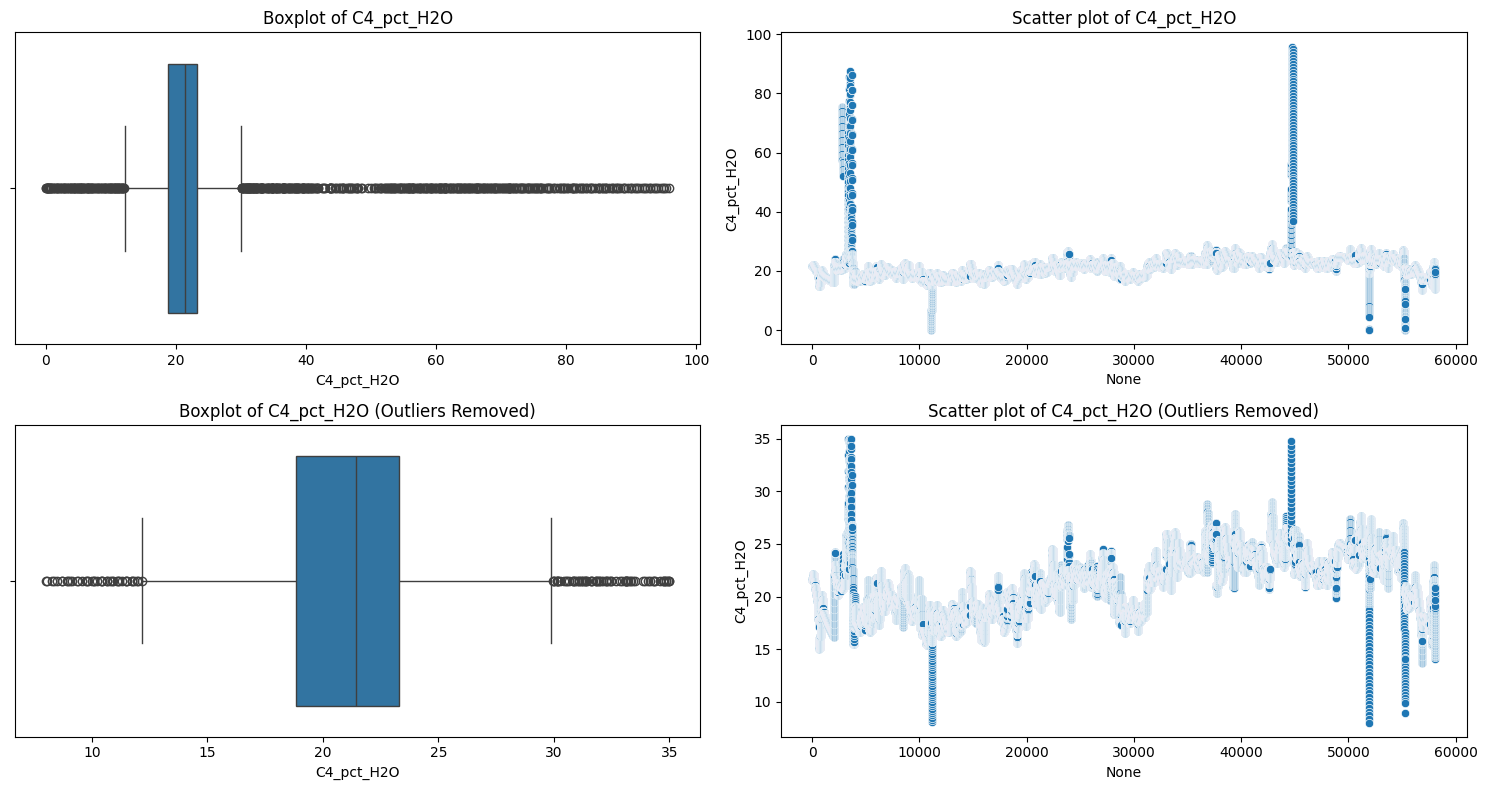

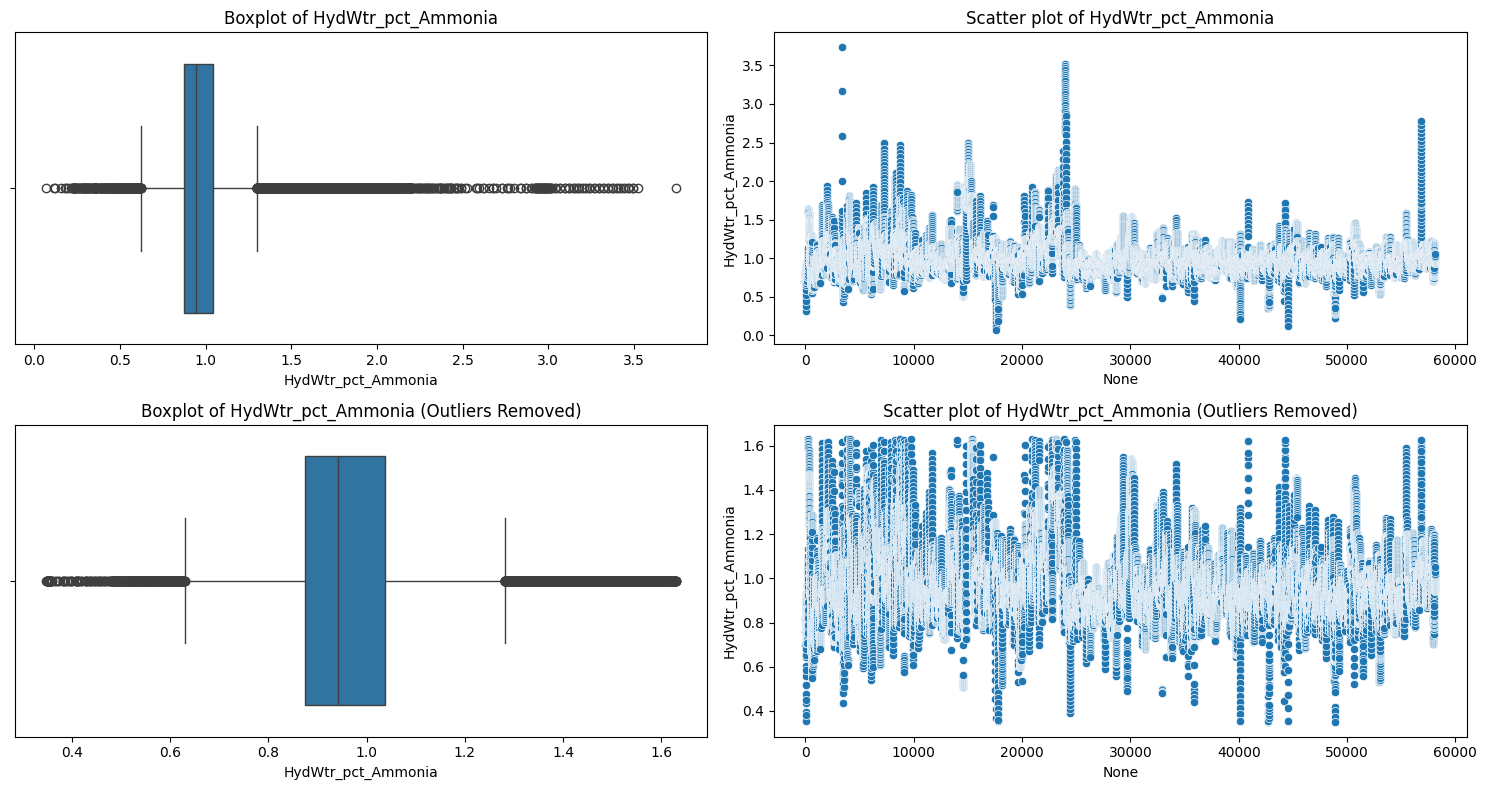

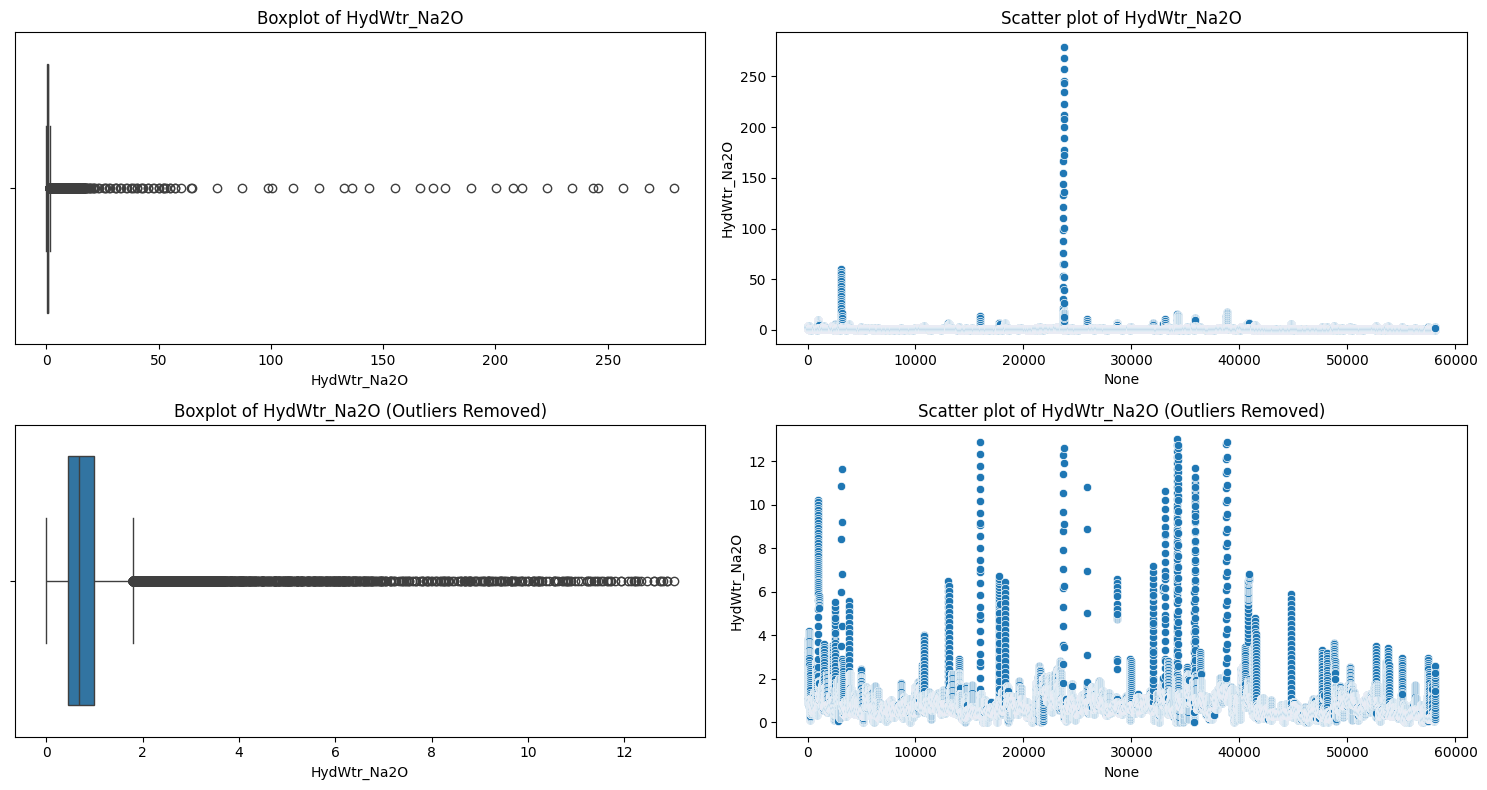

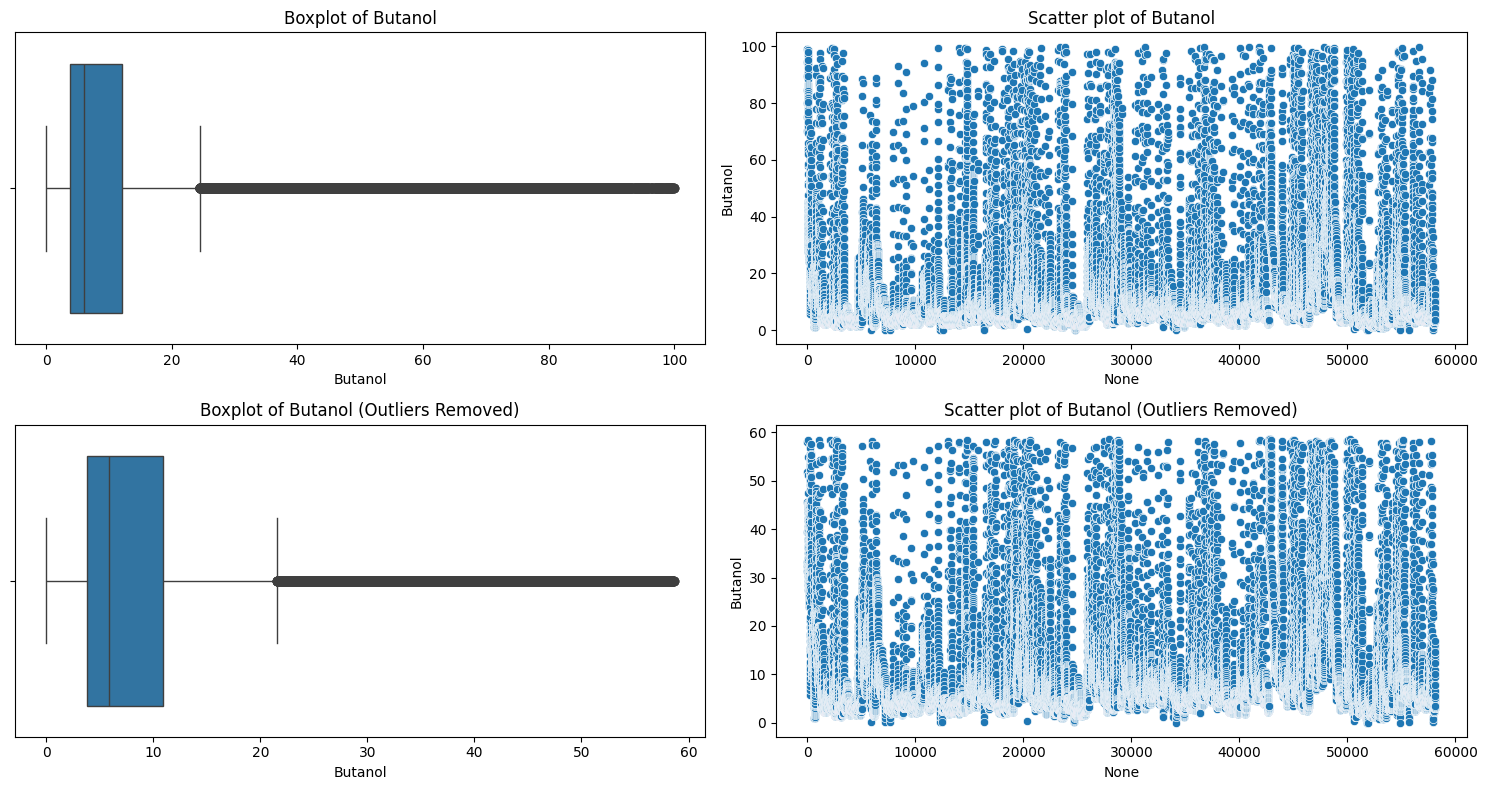

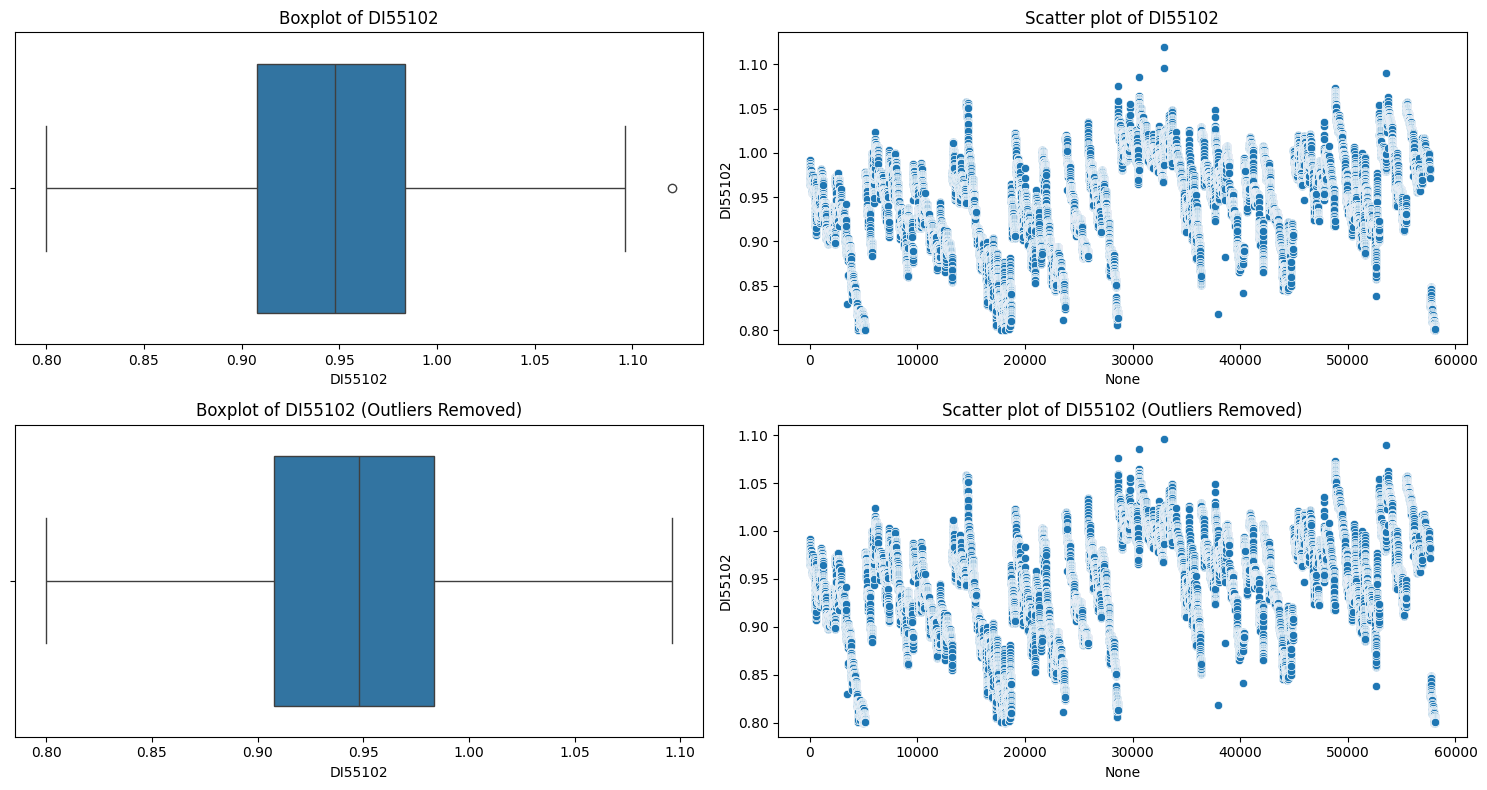

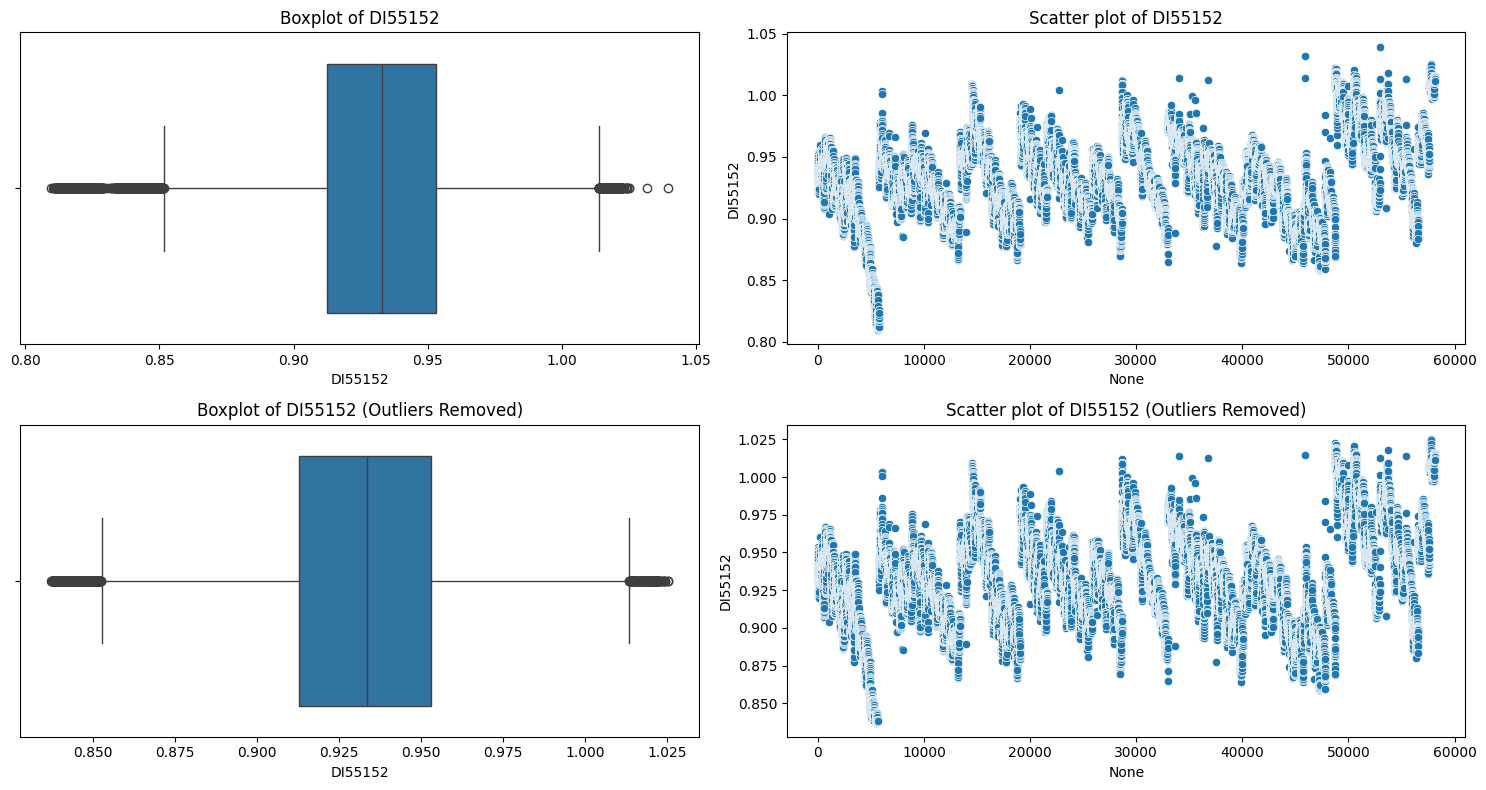

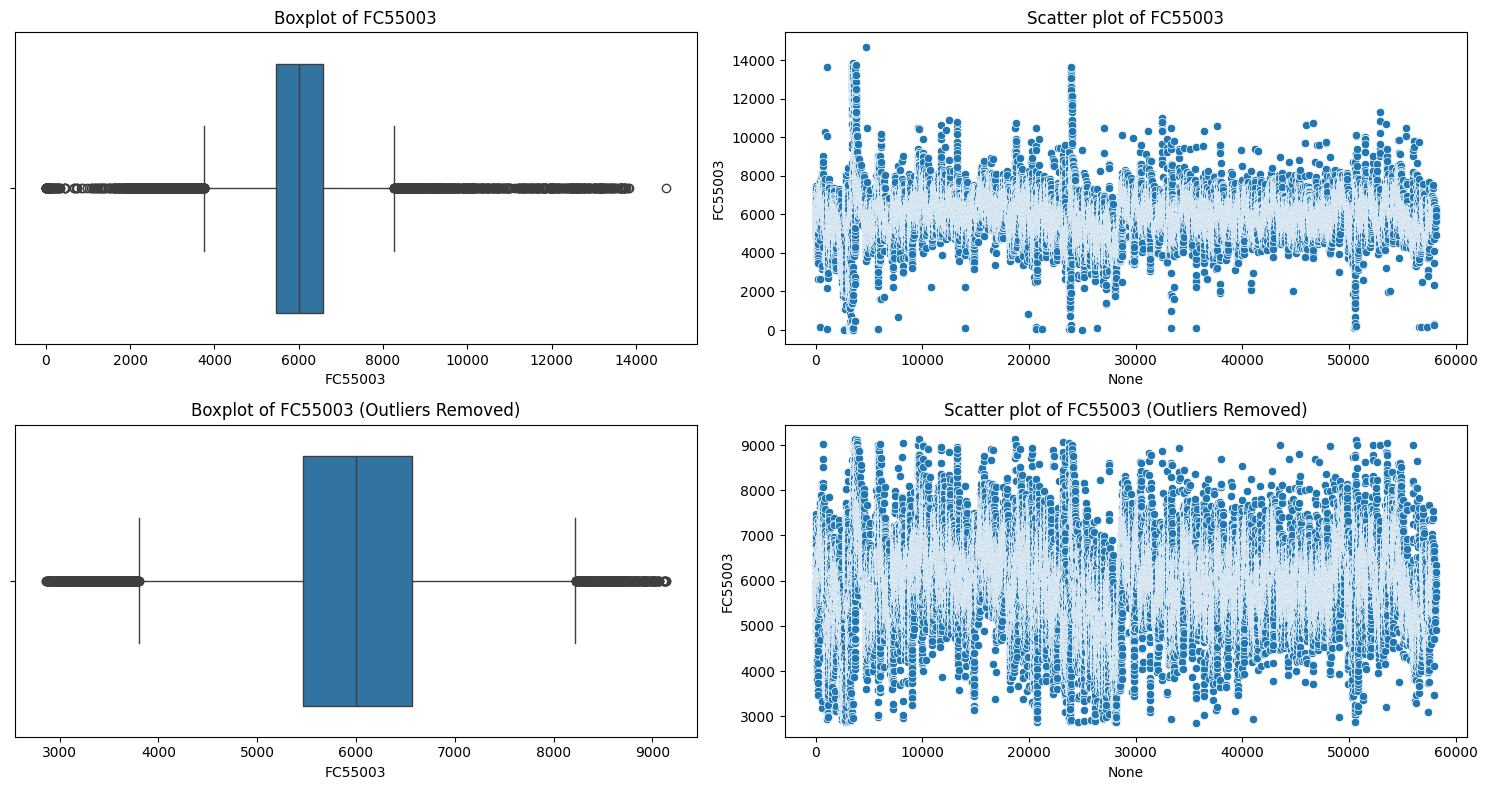

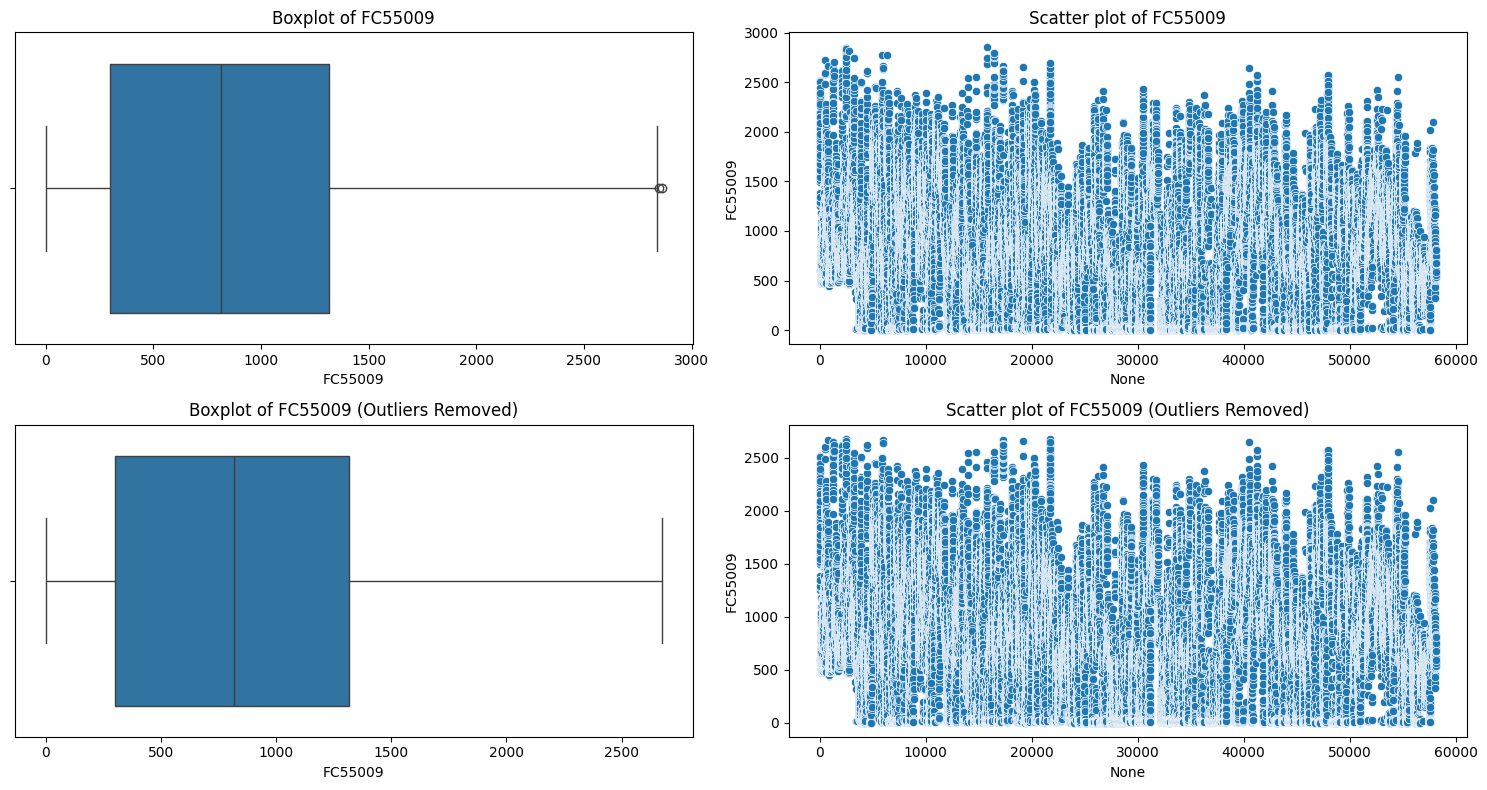

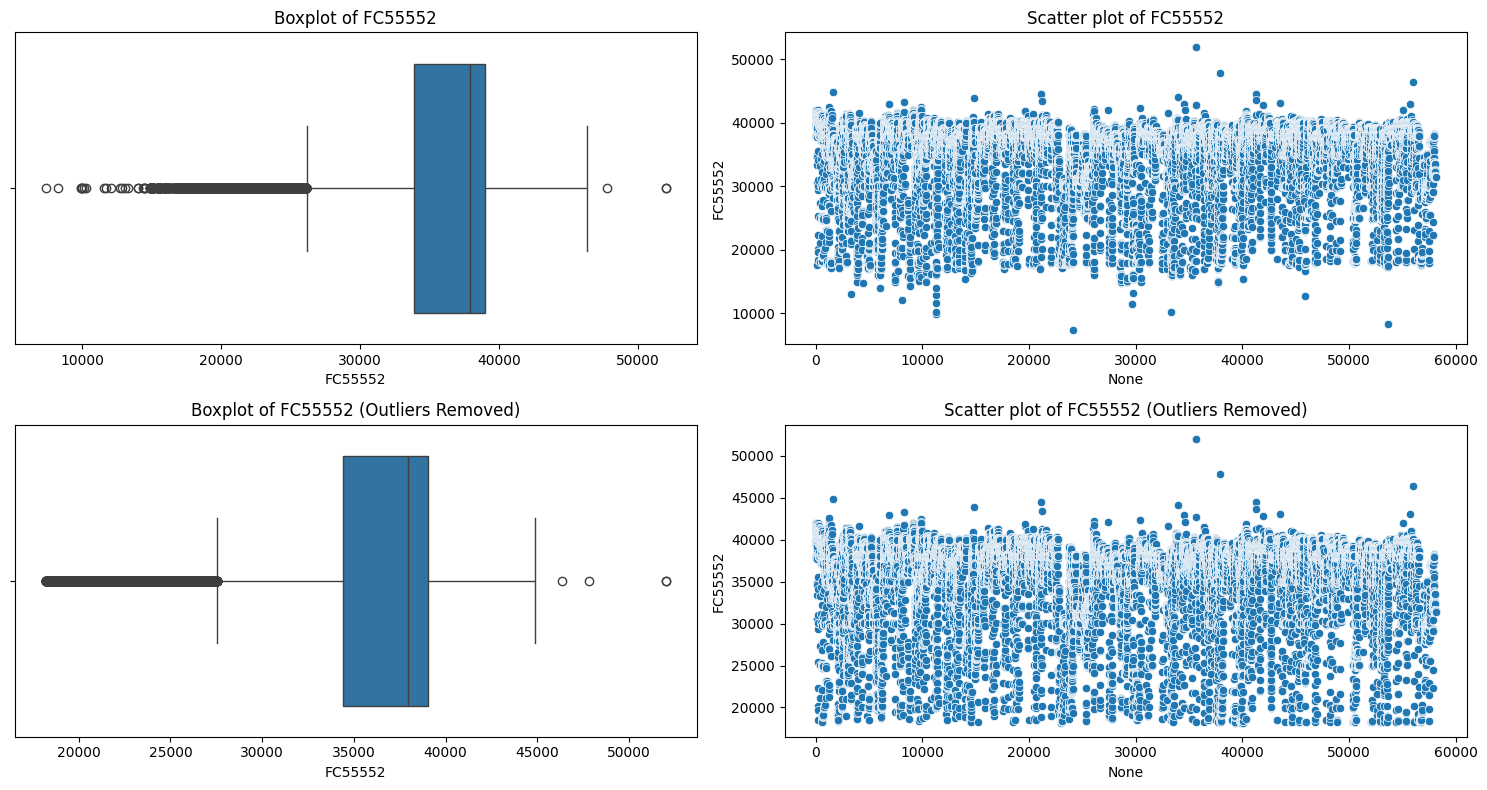

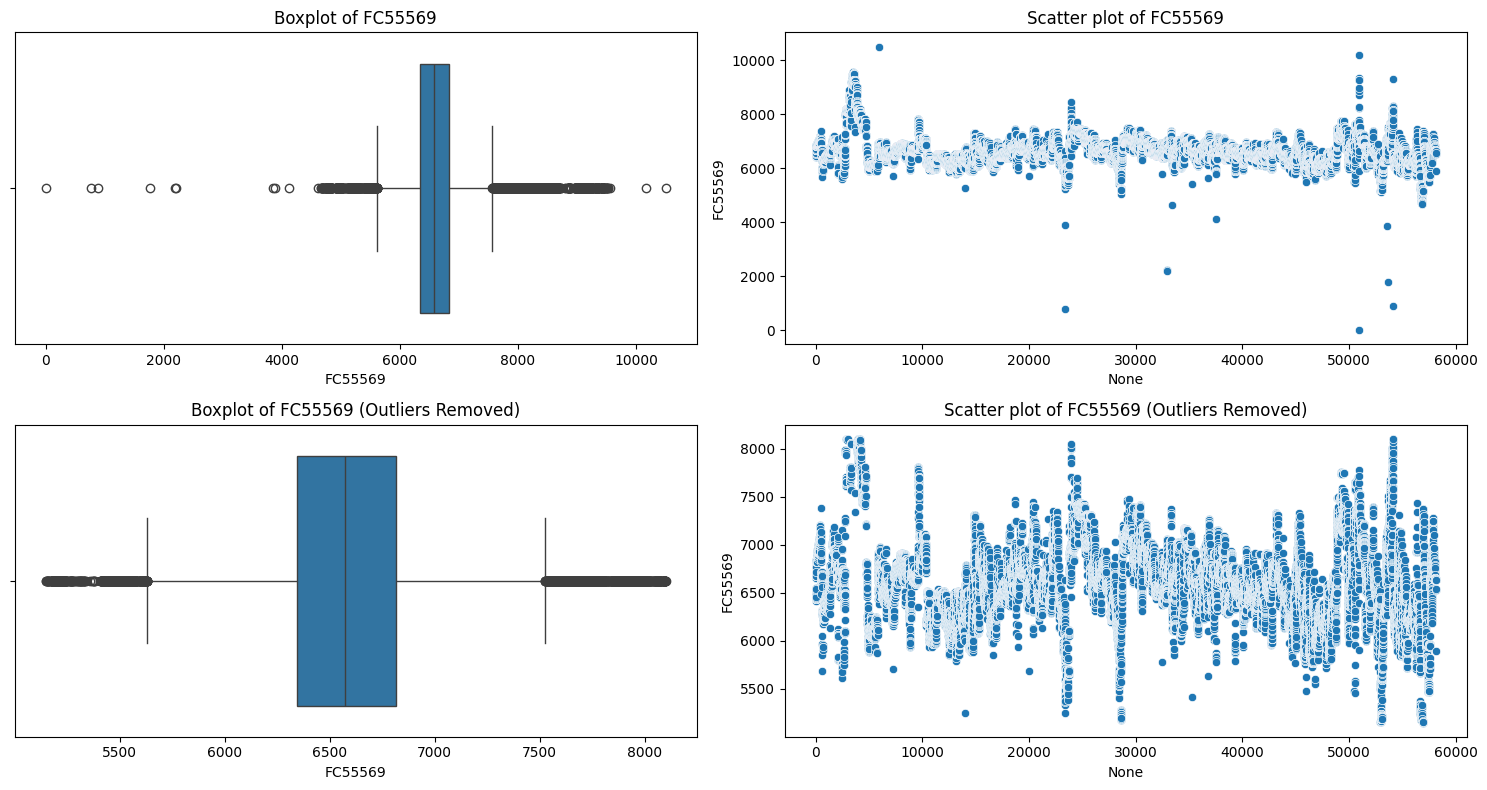

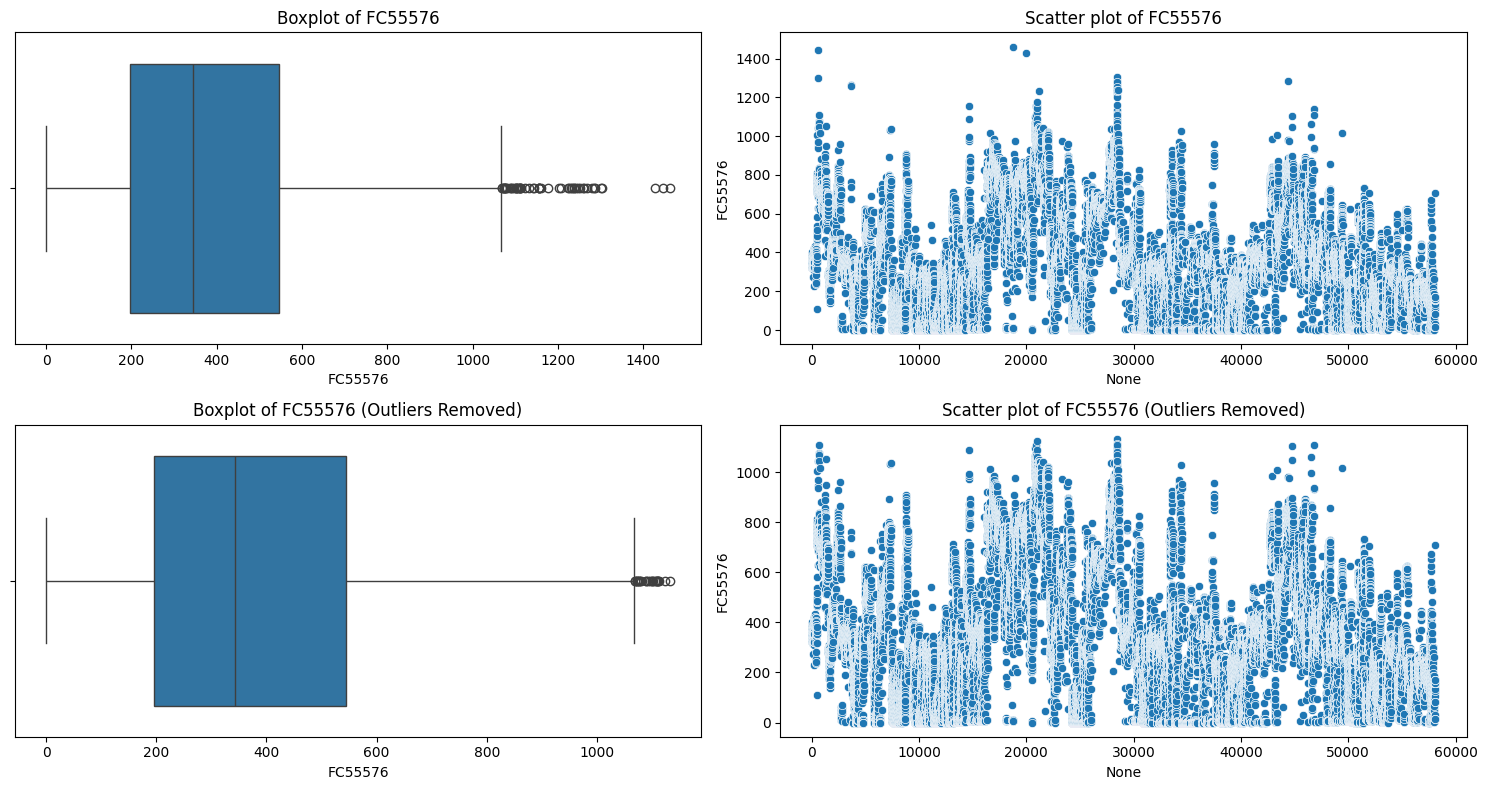

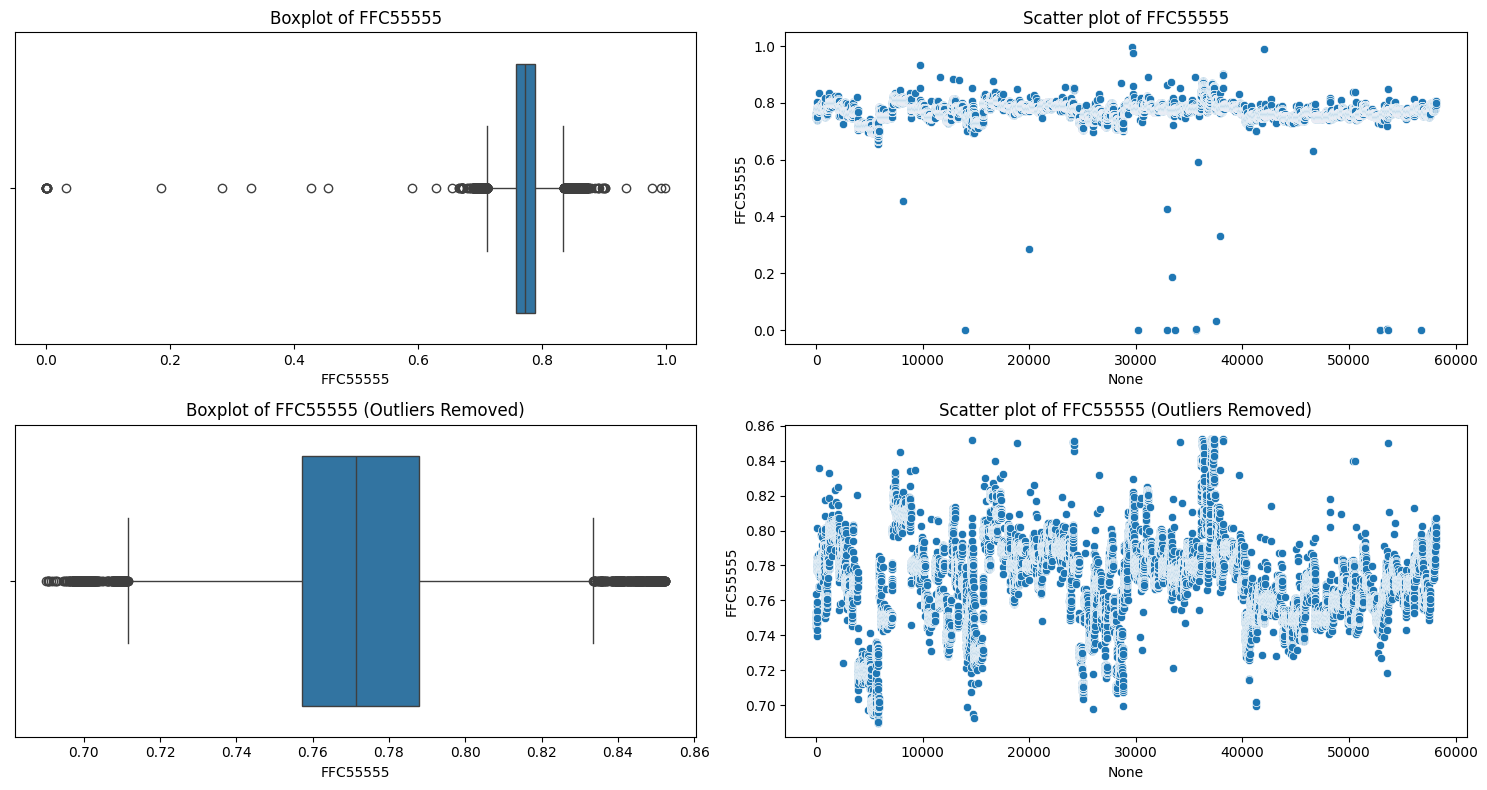

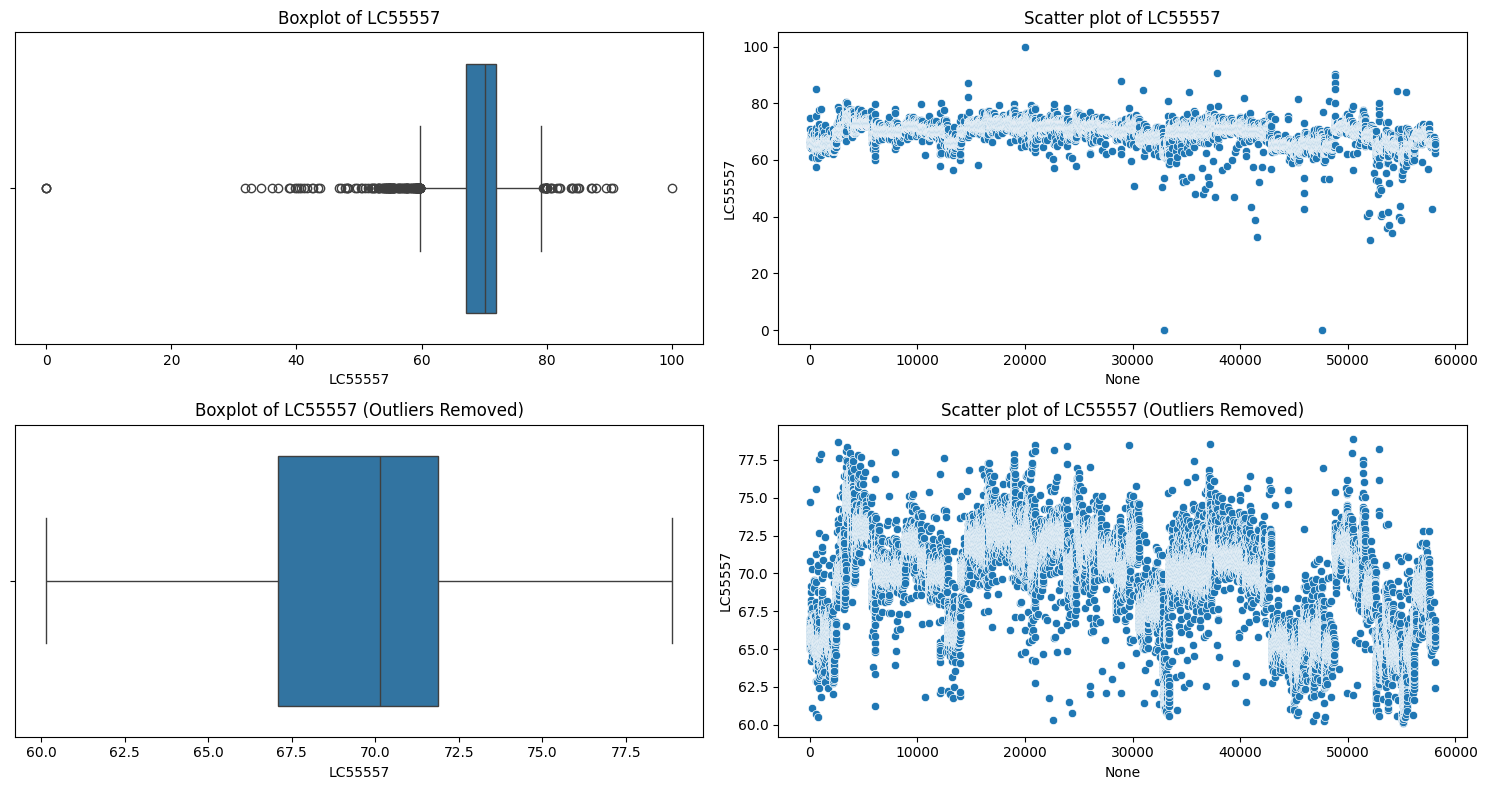

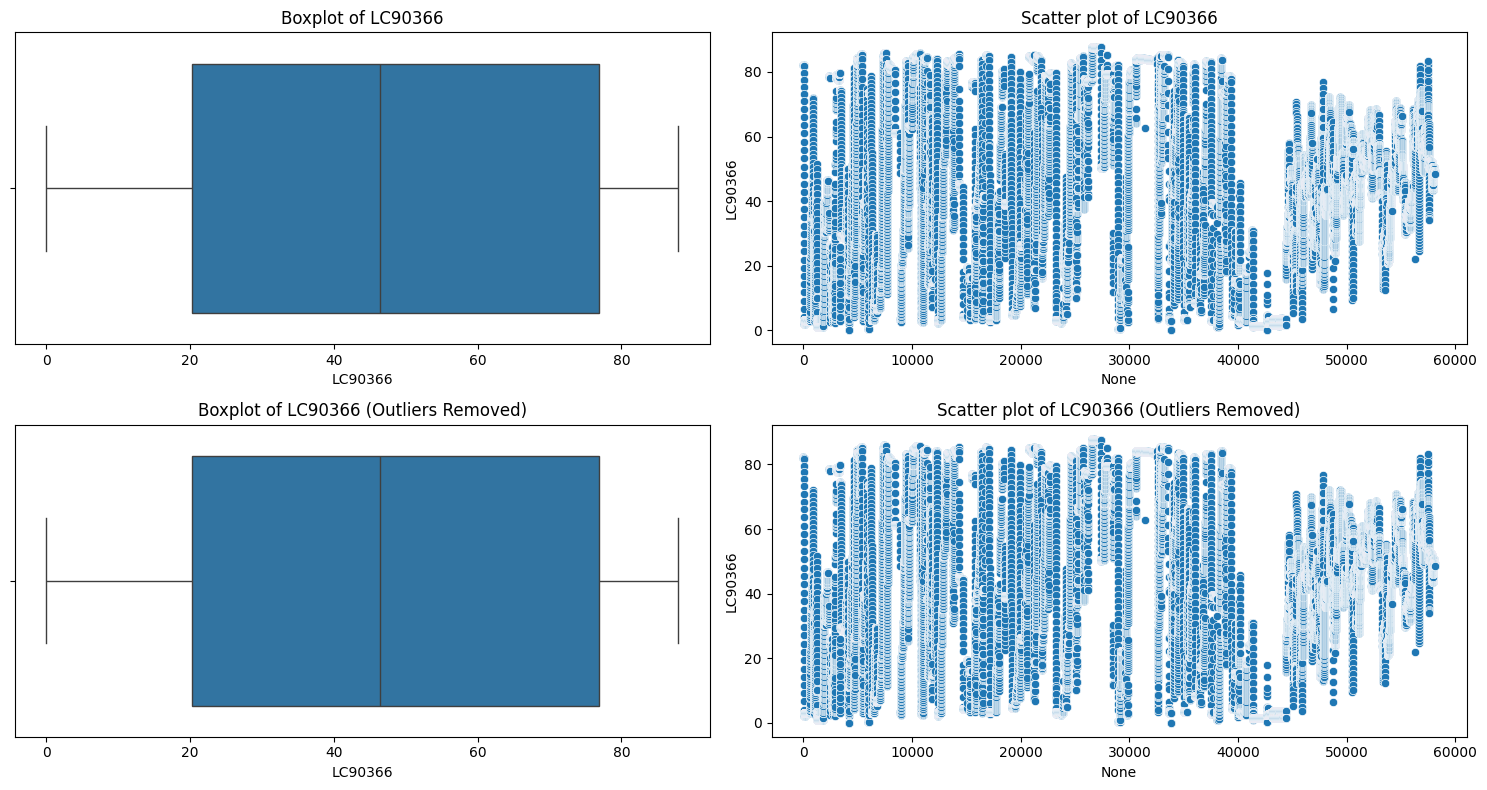

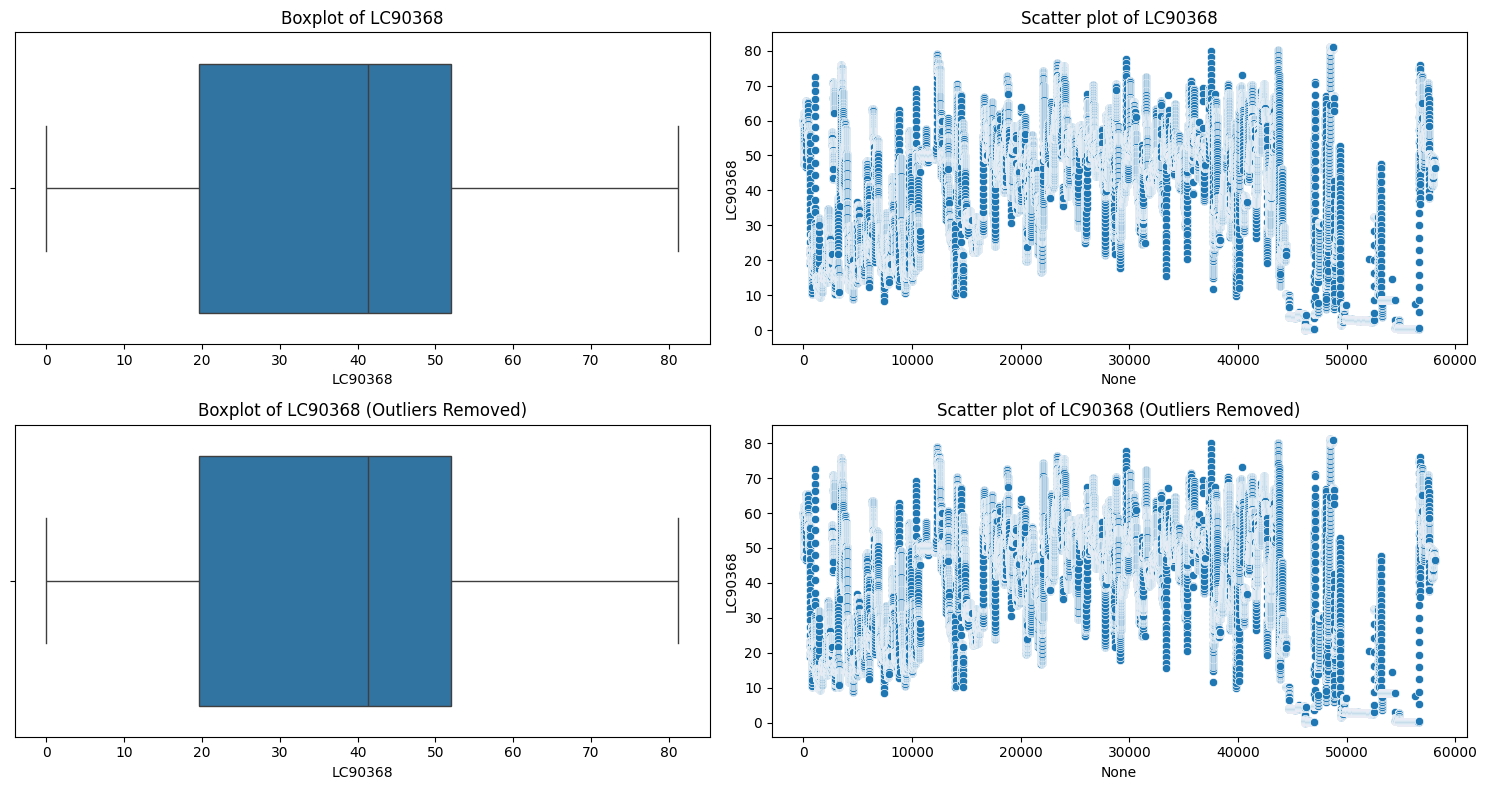

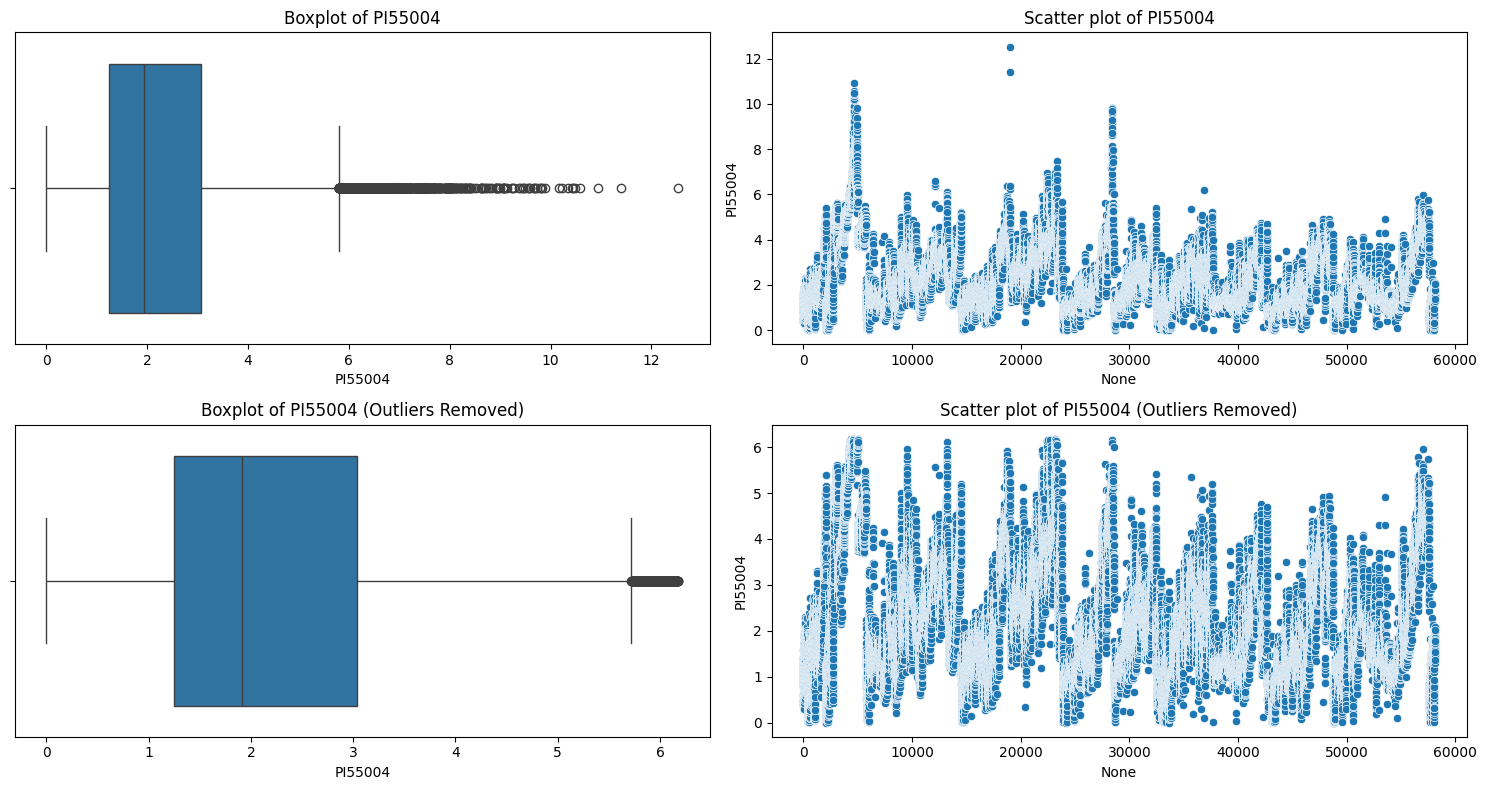

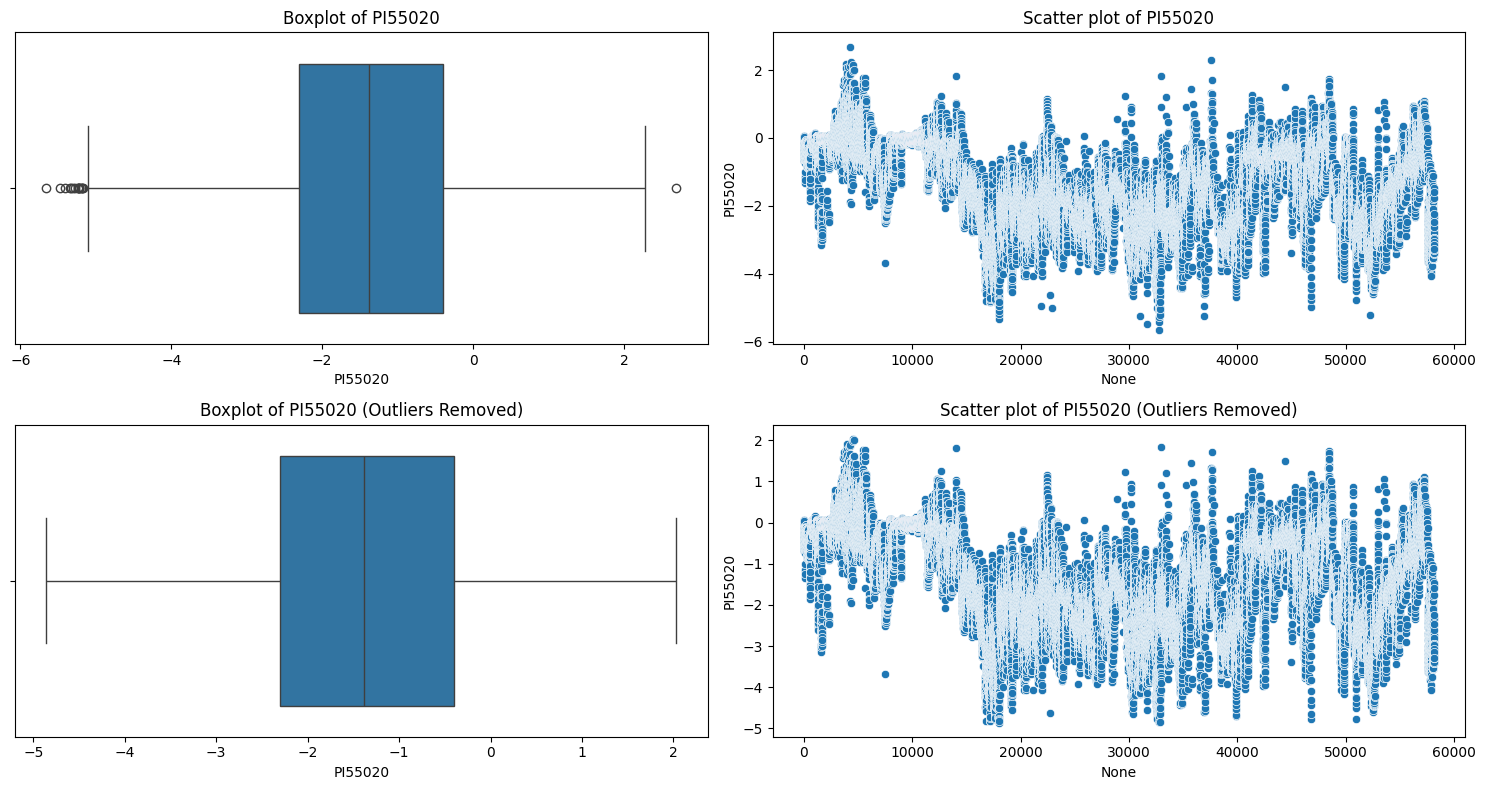

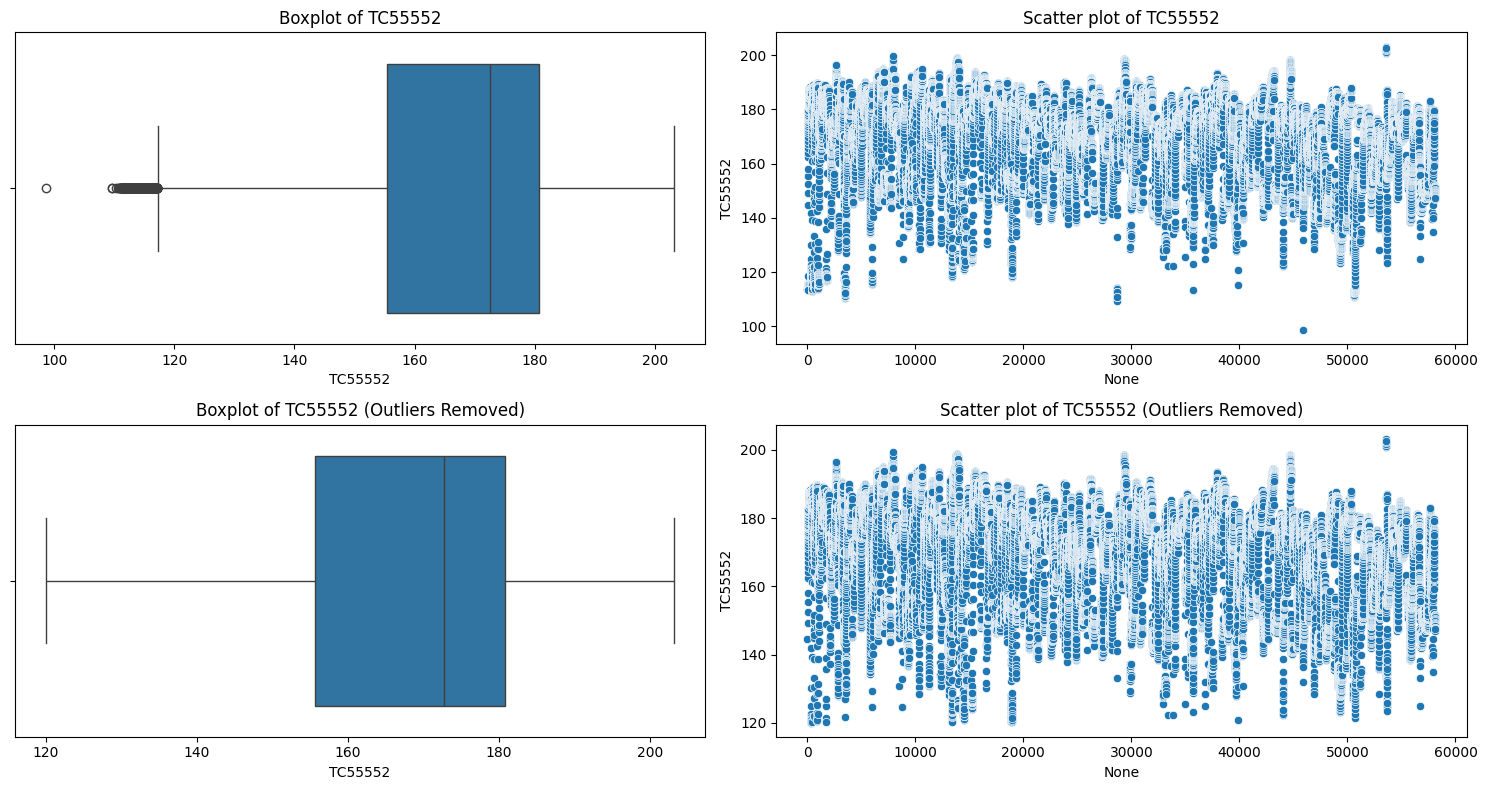

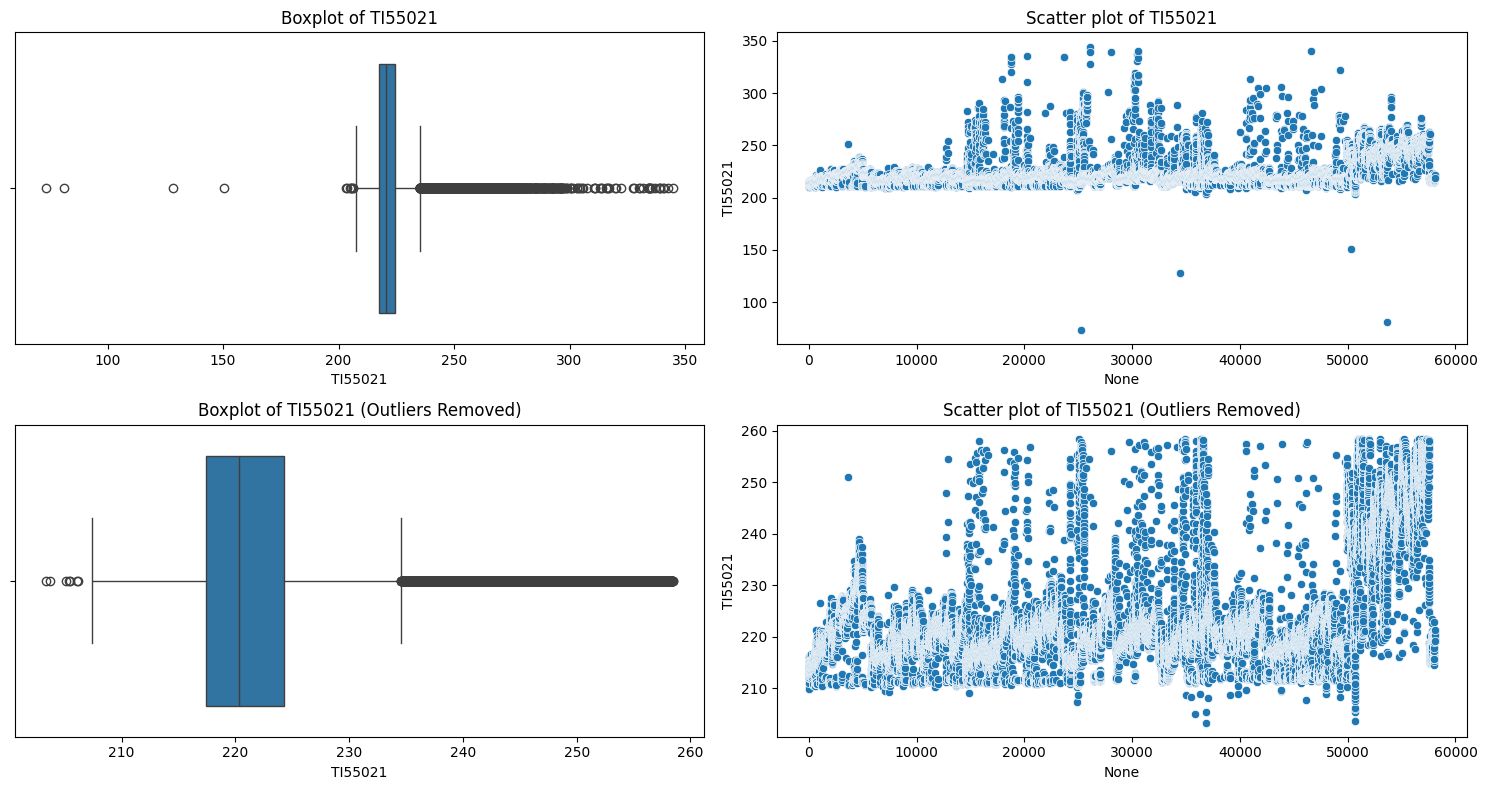

In [30]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [31]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [32]:
df_outlierHandling = df_plotted_Outliers_removed.copy()

In [33]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       58125          57687        438        0.753548
1           C4_pct_Eth       58125          57988        137        0.235699
2           C4_pct_H2O       58125          57671        454        0.781075
3   HydWtr_pct_Ammonia       58125          57025       1100        1.892473
4          HydWtr_Na2O       58125          58002        123        0.211613
5              Butanol       58125          56250       1875        3.225806
6              DI55102       58125          58124          1        0.001720
7              DI55152       58125          57731        394        0.677849
8              FC55003       58125          57295        830        1.427957
9              FC55009       58125          58073         52        0.089462
10             FC55552       58125          56480       1645        2.830108
11             FC55569       58125          56976       1149        1.976774

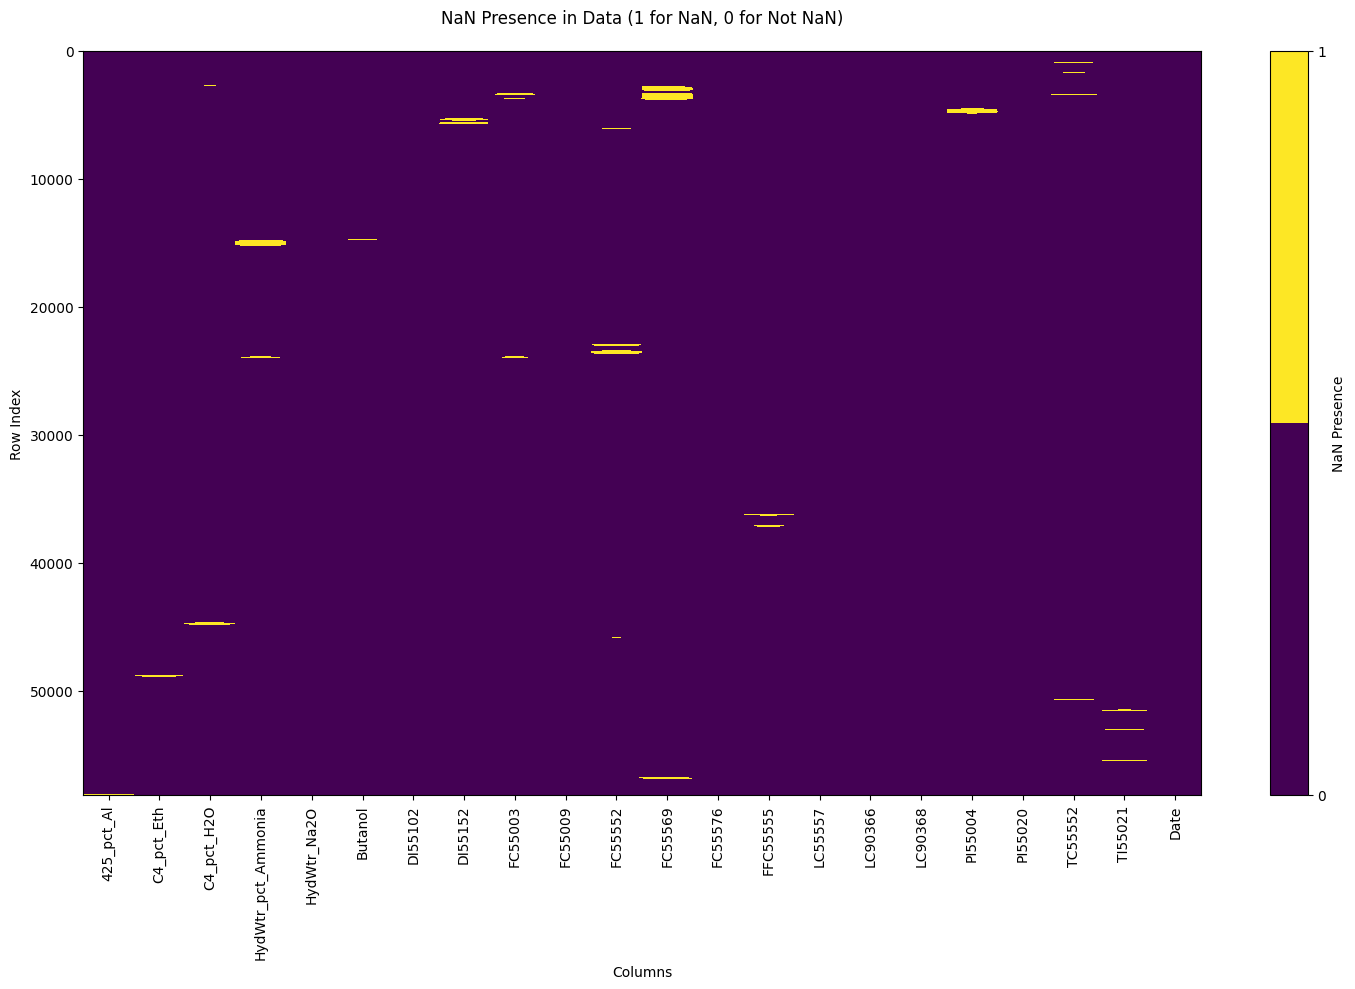

In [34]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [35]:
df_outlierHandling = df_outlierHandling.dropna().copy()



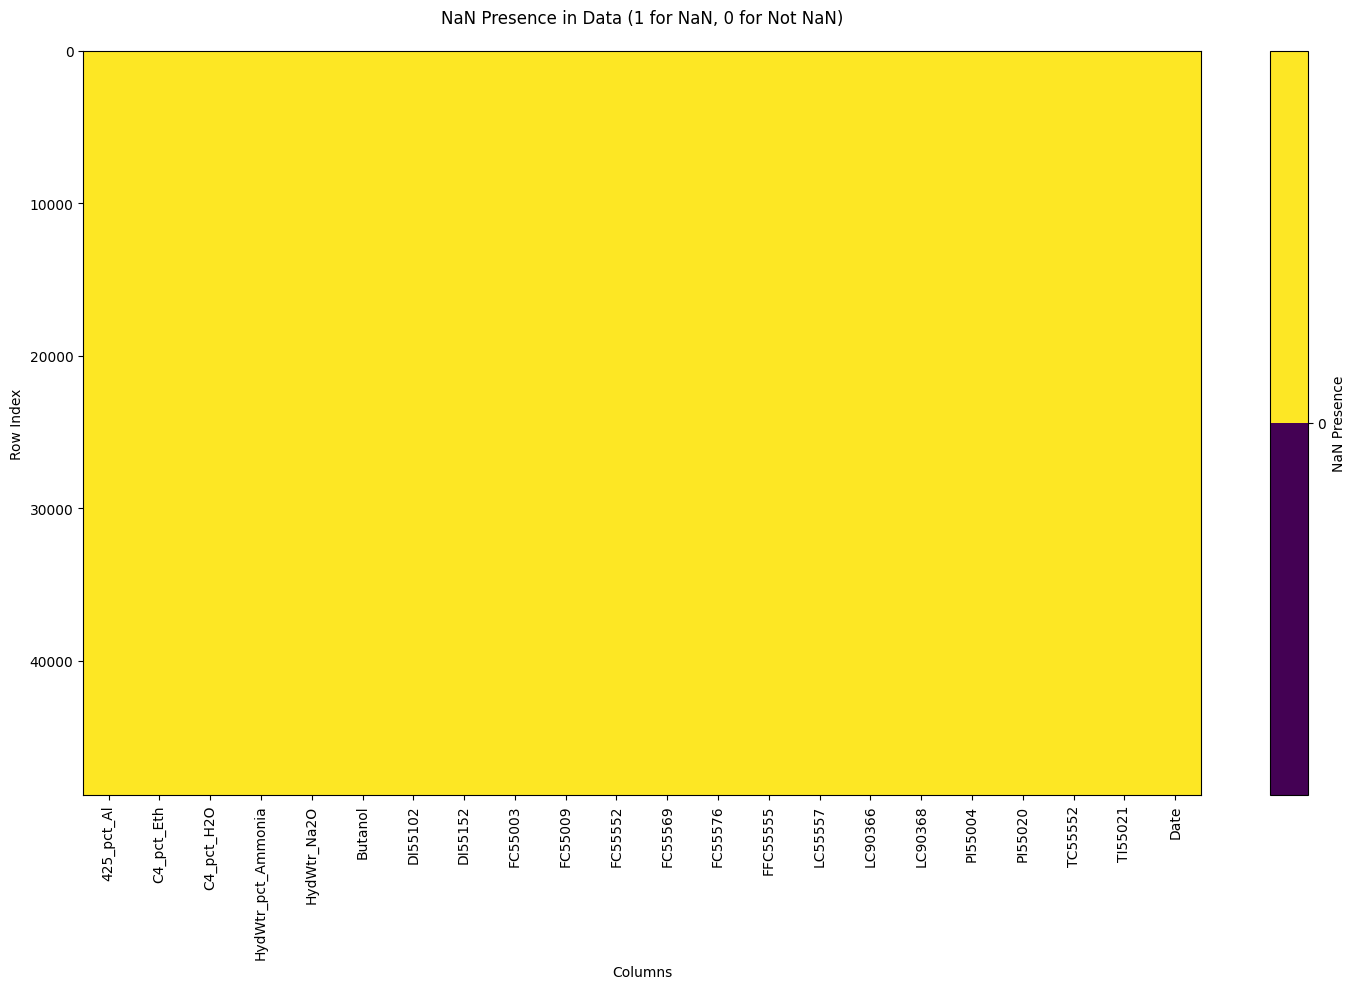

In [36]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [37]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0           425_pct_Al       48806          48806          0             0.0
1           C4_pct_Eth       48806          48806          0             0.0
2           C4_pct_H2O       48806          48806          0             0.0
3   HydWtr_pct_Ammonia       48806          48806          0             0.0
4          HydWtr_Na2O       48806          48806          0             0.0
5              Butanol       48806          48806          0             0.0
6              DI55102       48806          48806          0             0.0
7              DI55152       48806          48806          0             0.0
8              FC55003       48806          48806          0             0.0
9              FC55009       48806          48806          0             0.0
10             FC55552       48806          48806          0             0.0
11             FC55569       48806          48806          0             0.0

In [38]:
# 40127  - All Tags included - 3/9/24

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 22


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [39]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [40]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia',
       'HydWtr_Na2O', 'Butanol', 'DI55102', 'DI55152', 'FC55003', 'FC55009',
       'FC55552', 'FC55569', 'FC55576', 'FFC55555', 'LC55557', 'LC90366',
       'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TI55021', 'Date'],
      dtype='object')

In [41]:
saoSelect = ['Date', '425_pct_Al', 
            #  'Al2O3', 'M_Value', 
             'C4_pct_Eth', 'C4_pct_H2O',
             'HydWtr_pct_Ammonia', 
            #  'C4_pct_Hex', 
             'HydWtr_Na2O']

fb554Select = ['Date', 'Butanol', 
            #    'Decanol', 'Ethanol', 'Hexanol', 'Octanol'
               ]

unitSelect = ['Date', 
    #           'DI55152', 'FC55003', 'FC55552', 
#               'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
#               'PI55004', 'TC55552', 'TI55021',

#               'DI55152', 'FC55003', 'FC55552', 
#               'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
#               'PI55004', 'TC55552', 'TC55555', 'TI55021', 'TC55555',

#               'DI55102', 'DI55152', 'DI55580', 'FC42428',
#               'FC55003', 'FC55552', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
#               'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
#               'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553', 'TC55555',

                # 'AYC55580', 
              'DI55102', 
              'DI55152', 
              # 'DI55580', # 'FC42428', # 'FC52018',
              'FC55003', 
              'FC55009', 
              # 'FC55102', # 'FC55152', 
              'FC55552', 
              # 'FC55555', 
              'FC55569', 
              'FC55576', 
              # 'FFC55553', 
              'FFC55555', 
              # 'FYC55553', # 'II52554', # 'LC52572', # 'LC55553', # 'LC55555', 
              'LC55557', 
              # 'LC55568', 
              'LC90366', 
              'LC90368', 
              'PI55004', 
              'PI55020', 
              # 'PI55560', # 'TC52015', 
              'TC55552', 
              # 'TC55553', # 'TC55555', # 'TC55566', # 'TI40050', # 'TI52014', 
              # 'TI55013', # 'TI55014', # 'TI55015', # 'TI55016', # 'TI55017', 
              'TI55021', 
              # 'TI55023',# 'VI52558B'

            #   'AYC55580', 'DI55102', 'DI55152', 'DI55580', 'FC42428', 'FC52018',
            #   'FC55003', 'FC55009', 'FC55102', 'FC55152', 'FC55552', 'FC55555', 'FC55569', 
            #   'FC55576', 'FFC55553', 'FFC55555', 'FYC55553', 'II52554', 'LC52572', 'LC55553', 
            #   'LC55555', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55004', 'PI55020', 
            #   'PI55560', 'TC52015', 'TC55552', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 
            #   'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 
            #   'TI55023','VI52558B'
              ]

df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()

num_columns_425 = df_clean_425.shape[1]
num_columns_554 = df_clean_554.shape[1]
num_columns_unit = df_clean_unit.shape[1]
num_columns_total = num_columns_554 + num_columns_425 + num_columns_unit


print("Number of features:", num_columns_total)

print("Number of features - (['Date']*2):", num_columns_total-2)


Number of features: 24
Number of features - (['Date']*2): 22


In [42]:
# df_clean_425.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_425Data_clean.csv', index=False)

# df_clean_554.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_554Data_clean.csv', index=False)

# df_clean_unit.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_unitData_clean.csv', index=False)


In [43]:
# bordeCode

df_clean_425.to_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Continuous Data\cont_425Data_clean.csv', index=False)

df_clean_554.to_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Continuous Data\cont_554Data_clean.csv', index=False)

df_clean_unit.to_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Continuous Data\cont_unitData_clean.csv', index=False)

In [44]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-03-25 13:03:01.682054
